# Problem Statement

The objective of the problem is to determine the target platform for every customer will prefer who isn't using the self service portal.
We have to make a classification model to predict the preference of of customers among the 4 self service portals based on the provided training data


# Importing Data

In [1]:
import pandas as pd
from pyxlsb import open_workbook

df=[]
with open_workbook(r'C:\Users\saurabh\Desktop\Coursera Python\EXL EQ\EXL_EQ_2020_Train_datasets.xlsb') as wb:
    with wb.get_sheet(2) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

train_data = pd.DataFrame(df[1:], columns=df[0])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=train_data.copy()

In [5]:
pd.get_option('display.max_columns',None)

20

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.head()

,cust_id,Account Tenure,Temporary Accounts Disconnected,Wireless Equipments Owned,Internet Connect Status,Voice Ticks,Social Positioning,Emails Opened,On-Demand Videos Watched,Median House Value,Billing issue IVR calls,Digital Equipments Owned,Duration News Channel Watched,Tenure for Video Prodect,DVD- HR Owned,Video Products Tickets,Spanish Video Package,Trades Delinquent,Median Family Income,Use of Credit Card,Rmail Count,Enrollment,Tickets Raised,Monthly recurring charge,Video Product Calls,Unique Agent Handled,Dirrct Mails Sent,Sales Call Made,Active Account Offer,Top Viewed Channels,Previous Account Status,Monthly Payment Mode,Scherp products Subscribed,Prefer direct mail,IVR call Redirects ticket,Dwelling Type,Hardcopy Statement,Self_Service_Platform
0,100001.0,2667.0,0.0,0.0,1768.0,0.0,4.0,0.0,2.0,291016.0,0.0,0.0,109.0,447.0,0.0,161.0,0.0,9.0,85287.0,27.0,0.0,0.0,4.0,153.0,0.0,0.0,.,0.0,0.0,other,Inactive,Standard,Video/Internet/Voice,N,None,Single Housing,N,Desktop
1,100002.0,435.0,0.0,0.0,515.0,0.0,3.0,0.0,0.0,137667.0,0.0,0.0,17.0,135.0,0.0,34.0,0.0,4.0,60868.0,4.0,0.0,0.0,1.0,74.0,0.0,0.0,.,0.0,0.0,other,Never,Standard,Video/Internet,N,None,Single Housing,N,Desktop
2,100003.0,1520.0,0.0,0.0,2280.0,0.0,6.0,0.0,4.0,301567.0,0.0,0.0,120.0,453.0,0.0,112.0,0.0,10.0,92324.0,26.0,0.0,0.0,5.0,133.0,0.0,0.0,.,0.0,0.0,other,Inactive,Standard,Video/Internet/Voice,N,Agent,Single Housing,Y,Desktop
3,100004.0,4393.0,0.0,1.0,5731.0,0.0,8.0,1.0,27.0,436735.0,1.0,0.0,726.0,797.0,1.0,266.0,0.0,33.0,117785.0,71.0,20.0,0.0,11.0,208.0,8.0,10.0,.,0.0,1.0,other,Active,Standard,Internet Only,None,None,Single Housing,N,Desktop
4,100005.0,3587.0,0.0,0.0,2493.0,0.0,7.0,0.0,7.0,314970.0,0.0,0.0,237.0,614.0,0.0,166.0,0.0,15.0,100083.0,46.0,33.0,0.0,6.0,155.0,0.0,1.0,.,0.0,0.0,movie_channel1,Never,Standard,Internet Only,N,None,Multi Housing,N,STB


In [8]:
df.shape

(300000, 38)

In [9]:
df.isnull().sum()

cust_id                                 0
Account Tenure                          0
Temporary Accounts Disconnected         0
Wireless Equipments Owned               0
Internet Connect Status                 0
Voice Ticks                             0
Social Positioning                      0
Emails Opened                           0
On-Demand Videos Watched                0
Median House Value                      0
Billing issue IVR calls                 0
Digital Equipments Owned                0
Duration News Channel Watched           0
Tenure for Video Prodect                0
DVD- HR Owned                           0
Video Products Tickets                  0
Spanish Video Package                   0
Trades Delinquent                       0
Median Family Income                    0
Use of Credit Card                      0
Rmail Count                          9916
Enrollment                              0
Tickets Raised                          0
Monthly recurring charge          

In [10]:
df.drop(['Dirrct Mails Sent','IVR call Redirects ticket'],axis=1,inplace=True)

In [11]:
df.shape

(300000, 36)

In [12]:
#Getting Object type features into one list
obj_features=[]
for i in range(0,len(df.columns)):
    if df.iloc[:,i].dtypes=='object' and df.iloc[:,i].name !='Self_Service_Platform': 
            obj_features.append(df.iloc[:,i].name)

In [13]:
for i in range(0,len(obj_features)):
    name=obj_features[i]
    df[name]=df[name].fillna(df[name].mode()[0])

In [14]:
df.isnull().sum()

cust_id                               0
Account Tenure                        0
Temporary Accounts Disconnected       0
Wireless Equipments Owned             0
Internet Connect Status               0
Voice Ticks                           0
Social Positioning                    0
Emails Opened                         0
On-Demand Videos Watched              0
Median House Value                    0
Billing issue IVR calls               0
Digital Equipments Owned              0
Duration News Channel Watched         0
Tenure for Video Prodect              0
DVD- HR Owned                         0
Video Products Tickets                0
Spanish Video Package                 0
Trades Delinquent                     0
Median Family Income                  0
Use of Credit Card                    0
Rmail Count                        9916
Enrollment                            0
Tickets Raised                        0
Monthly recurring charge              0
Video Product Calls                   0


In [15]:
df['Rmail Count']=df['Rmail Count'].fillna(df['Rmail Count'].mean())

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in range(0,len(obj_features)):
    name=obj_features[i]
    df[name]=le.fit_transform(df[name].astype(str))

In [17]:
float_features=[]
for i in range(0,len(df.columns)):
    if df.iloc[:,i].dtypes=='float' and df.iloc[:,i].name !='Self_Service_Platform': 
            float_features.append(df.iloc[:,i].name)

In [18]:
for i in range(0,len(float_features)):
    name=float_features[i]
    df[name]=df[name].astype('int')

In [19]:
df.head()

,cust_id,Account Tenure,Temporary Accounts Disconnected,Wireless Equipments Owned,Internet Connect Status,Voice Ticks,Social Positioning,Emails Opened,On-Demand Videos Watched,Median House Value,Billing issue IVR calls,Digital Equipments Owned,Duration News Channel Watched,Tenure for Video Prodect,DVD- HR Owned,Video Products Tickets,Spanish Video Package,Trades Delinquent,Median Family Income,Use of Credit Card,Rmail Count,Enrollment,Tickets Raised,Monthly recurring charge,Video Product Calls,Unique Agent Handled,Sales Call Made,Active Account Offer,Top Viewed Channels,Previous Account Status,Monthly Payment Mode,Scherp products Subscribed,Prefer direct mail,Dwelling Type,Hardcopy Statement,Self_Service_Platform
0,100001,2667,0,0,1768,0,4,0,2,291016,0,0,109,447,0,161,0,9,85287,27,0,0,4,153,0,0,0,0,5,2,2,9,0,4,0,Desktop
1,100002,435,0,0,515,0,3,0,0,137667,0,0,17,135,0,34,0,4,60868,4,0,0,1,74,0,0,0,0,5,3,2,7,0,4,0,Desktop
2,100003,1520,0,0,2280,0,6,0,4,301567,0,0,120,453,0,112,0,10,92324,26,0,0,5,133,0,0,0,0,5,2,2,9,0,4,1,Desktop
3,100004,4393,0,1,5731,0,8,1,27,436735,1,0,726,797,1,266,0,33,117785,71,20,0,11,208,8,10,0,1,5,0,2,1,0,4,0,Desktop
4,100005,3587,0,0,2493,0,7,0,7,314970,0,0,237,614,0,166,0,15,100083,46,33,0,6,155,0,1,0,0,2,3,2,1,0,2,0,STB


In [20]:
df.sort_values(by='cust_id')
train=df.iloc[:300000,:]
print('Shape of Train Data :' + str(train.shape))

Shape of Train Data :(300000, 36)


In [21]:
train.head()

,cust_id,Account Tenure,Temporary Accounts Disconnected,Wireless Equipments Owned,Internet Connect Status,Voice Ticks,Social Positioning,Emails Opened,On-Demand Videos Watched,Median House Value,Billing issue IVR calls,Digital Equipments Owned,Duration News Channel Watched,Tenure for Video Prodect,DVD- HR Owned,Video Products Tickets,Spanish Video Package,Trades Delinquent,Median Family Income,Use of Credit Card,Rmail Count,Enrollment,Tickets Raised,Monthly recurring charge,Video Product Calls,Unique Agent Handled,Sales Call Made,Active Account Offer,Top Viewed Channels,Previous Account Status,Monthly Payment Mode,Scherp products Subscribed,Prefer direct mail,Dwelling Type,Hardcopy Statement,Self_Service_Platform
0,100001,2667,0,0,1768,0,4,0,2,291016,0,0,109,447,0,161,0,9,85287,27,0,0,4,153,0,0,0,0,5,2,2,9,0,4,0,Desktop
1,100002,435,0,0,515,0,3,0,0,137667,0,0,17,135,0,34,0,4,60868,4,0,0,1,74,0,0,0,0,5,3,2,7,0,4,0,Desktop
2,100003,1520,0,0,2280,0,6,0,4,301567,0,0,120,453,0,112,0,10,92324,26,0,0,5,133,0,0,0,0,5,2,2,9,0,4,1,Desktop
3,100004,4393,0,1,5731,0,8,1,27,436735,1,0,726,797,1,266,0,33,117785,71,20,0,11,208,8,10,0,1,5,0,2,1,0,4,0,Desktop
4,100005,3587,0,0,2493,0,7,0,7,314970,0,0,237,614,0,166,0,15,100083,46,33,0,6,155,0,1,0,0,2,3,2,1,0,2,0,STB


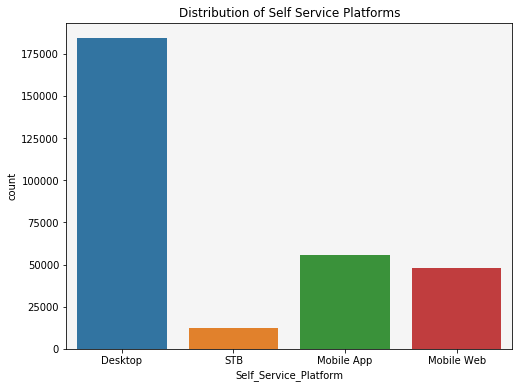

In [22]:
# Countplot
plt.figure(figsize=(8,6))
ax=plt.axes()
sns.countplot(train['Self_Service_Platform'])
plt.title('Distribution of Self Service Platforms')
ax.set_facecolor('whitesmoke')
plt.savefig('count.png')

In [23]:
train.drop('cust_id',axis=1,inplace=True)

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
X=train.drop('Self_Service_Platform',axis=1)
y=train['Self_Service_Platform']

# Feature Engineering

In [26]:
# Apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                           Features         Score
8                Median House Value  2.384690e+10
17             Median Family Income  1.560318e+10
3           Internet Connect Status  8.736955e+07
0                    Account Tenure  1.442875e+07
11    Duration News Channel Watched  3.021582e+06
22         Monthly recurring charge  1.215185e+06
21                   Tickets Raised  8.399311e+05
14           Video Products Tickets  6.323093e+05
7          On-Demand Videos Watched  6.028912e+05
9           Billing issue IVR calls  1.866519e+05
16                Trades Delinquent  1.190024e+05
12         Tenure for Video Prodect  6.164352e+04
1   Temporary Accounts Disconnected  6.040540e+04
18               Use of Credit Card  5.888445e+04
24             Unique Agent Handled  4.249059e+04


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print("X_train shape: "+str(X_train.shape))
print("X_test shape: "+str(X_test.shape))
print("y_train shape: "+str(y_train.shape))
print("y_test shape: "+str(y_test.shape))

X_train shape: (225000, 34)
X_test shape: (75000, 34)
y_train shape: (225000,)
y_test shape: (75000,)


In [29]:
print(featureScores.nlargest(15,'Score')['Features'])

8                  Median House Value
17               Median Family Income
3             Internet Connect Status
0                      Account Tenure
11      Duration News Channel Watched
22           Monthly recurring charge
21                     Tickets Raised
14             Video Products Tickets
7            On-Demand Videos Watched
9             Billing issue IVR calls
16                  Trades Delinquent
12           Tenure for Video Prodect
1     Temporary Accounts Disconnected
18                 Use of Credit Card
24               Unique Agent Handled
Name: Features, dtype: object


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
dt1=DecisionTreeClassifier(max_depth=9)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
importance=dt1.feature_importances_

In [33]:
col=X.columns
new=pd.DataFrame({'Importance': importance},index=col)
print(new.sort_values(by='Importance',ascending=False))
new.rename({'Rmail Count': 'Email Count'}, axis='index',inplace=True)

                                 Importance
Account Tenure                     0.299154
Wireless Equipments Owned          0.153926
Active Account Offer               0.095643
Trades Delinquent                  0.076718
Social Positioning                 0.068748
Video Product Calls                0.054789
Median Family Income               0.048354
Monthly recurring charge           0.041706
Billing issue IVR calls            0.033524
Internet Connect Status            0.028956
Tickets Raised                     0.017789
Use of Credit Card                 0.014724
Tenure for Video Prodect           0.011450
Digital Equipments Owned           0.011428
Video Products Tickets             0.011368
Emails Opened                      0.007632
Median House Value                 0.006131
Duration News Channel Watched      0.006022
Temporary Accounts Disconnected    0.004503
On-Demand Videos Watched           0.002131
Rmail Count                        0.001246
Voice Ticks                     

## Feature Selection Chart

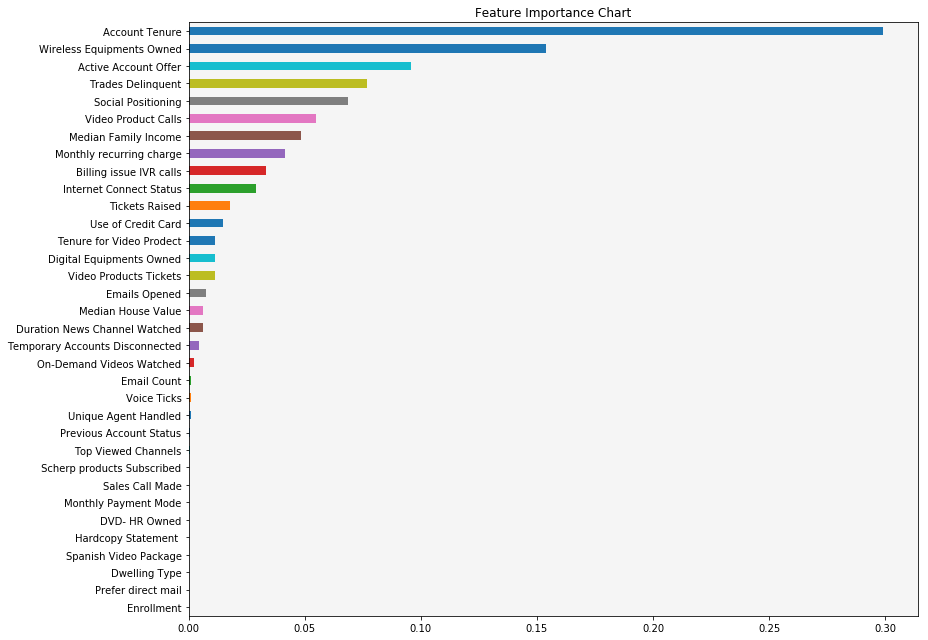

In [34]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(13,9))
new['Importance'].sort_values().plot(kind='barh')
plt.title('Feature Importance Chart')
ax=plt.axes()
ax.set_facecolor('whitesmoke')
plt.savefig('feature_importance.png')

In [35]:
train.head(20)

,Account Tenure,Temporary Accounts Disconnected,Wireless Equipments Owned,Internet Connect Status,Voice Ticks,Social Positioning,Emails Opened,On-Demand Videos Watched,Median House Value,Billing issue IVR calls,Digital Equipments Owned,Duration News Channel Watched,Tenure for Video Prodect,DVD- HR Owned,Video Products Tickets,Spanish Video Package,Trades Delinquent,Median Family Income,Use of Credit Card,Rmail Count,Enrollment,Tickets Raised,Monthly recurring charge,Video Product Calls,Unique Agent Handled,Sales Call Made,Active Account Offer,Top Viewed Channels,Previous Account Status,Monthly Payment Mode,Scherp products Subscribed,Prefer direct mail,Dwelling Type,Hardcopy Statement,Self_Service_Platform
0,2667,0,0,1768,0,4,0,2,291016,0,0,109,447,0,161,0,9,85287,27,0,0,4,153,0,0,0,0,5,2,2,9,0,4,0,Desktop
1,435,0,0,515,0,3,0,0,137667,0,0,17,135,0,34,0,4,60868,4,0,0,1,74,0,0,0,0,5,3,2,7,0,4,0,Desktop
2,1520,0,0,2280,0,6,0,4,301567,0,0,120,453,0,112,0,10,92324,26,0,0,5,133,0,0,0,0,5,2,2,9,0,4,1,Desktop
3,4393,0,1,5731,0,8,1,27,436735,1,0,726,797,1,266,0,33,117785,71,20,0,11,208,8,10,0,1,5,0,2,1,0,4,0,Desktop
4,3587,0,0,2493,0,7,0,7,314970,0,0,237,614,0,166,0,15,100083,46,33,0,6,155,0,1,0,0,2,3,2,1,0,2,0,STB
5,1071,0,1,6840,0,8,0,33,345363,1,0,655,694,1,159,0,45,89112,78,7,0,18,186,11,10,0,1,5,0,2,3,1,4,1,Mobile App
6,3079,0,0,3105,0,7,0,7,331691,0,0,268,614,0,191,0,19,103460,47,30,0,6,169,0,2,0,0,5,3,2,9,0,1,0,Desktop
7,1529,0,1,7506,1,3,0,53,244942,11,0,772,646,1,313,0,29,71513,69,3,0,8,209,9,11,0,1,5,4,2,7,0,4,1,STB
8,95,0,0,84,0,0,0,0,60845,0,0,0,25,0,2,0,0,26467,0,0,0,1,33,0,0,0,0,0,4,2,7,0,4,0,Mobile App
9,7784,0,1,5899,1,9,2,30,507727,1,0,965,983,1,353,0,35,134331,75,21,0,14,215,10,10,0,1,5,4,2,7,0,4,0,Desktop


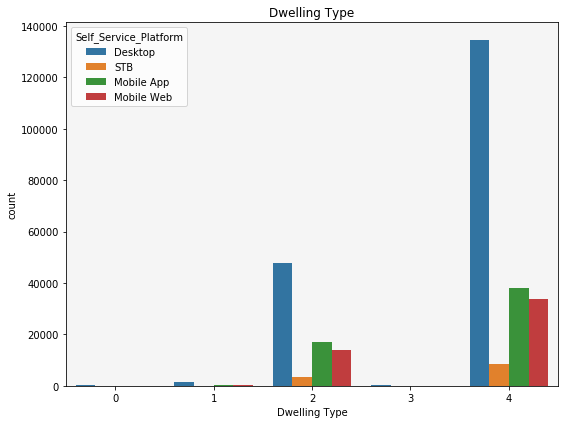

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x=train['Dwelling Type'],hue=train['Self_Service_Platform'])
plt.title('Dwelling Type')
ax=plt.axes()
ax.set_facecolor('whitesmoke')
plt.savefig('Dwelling_Type.png')

In [37]:
out1=train[['Account Tenure','Wireless Equipments Owned','Active Account Offer','Trades Delinquent','Social Positioning','Video Product Calls',
            'Median Family Income','Monthly recurring charge','Billing issue IVR calls','Internet Connect Status','Tickets Raised','Use of Credit Card',
            'Tenure for Video Prodect','Video Products Tickets','Self_Service_Platform']]
out_1=train[['Account Tenure','Wireless Equipments Owned','Active Account Offer','Trades Delinquent','Social Positioning','Video Product Calls',
            'Median Family Income','Monthly recurring charge','Billing issue IVR calls','Internet Connect Status','Tickets Raised','Use of Credit Card'
             ,'Tenure for Video Prodect','Video Products Tickets']]
out_1.head()

,Account Tenure,Wireless Equipments Owned,Active Account Offer,Trades Delinquent,Social Positioning,Video Product Calls,Median Family Income,Monthly recurring charge,Billing issue IVR calls,Internet Connect Status,Tickets Raised,Use of Credit Card,Tenure for Video Prodect,Video Products Tickets
0,2667,0,0,9,4,0,85287,153,0,1768,4,27,447,161
1,435,0,0,4,3,0,60868,74,0,515,1,4,135,34
2,1520,0,0,10,6,0,92324,133,0,2280,5,26,453,112
3,4393,1,1,33,8,8,117785,208,1,5731,11,71,797,266
4,3587,0,0,15,7,0,100083,155,0,2493,6,46,614,166


# Dealing with Outliers

In [38]:
Q1 = out_1.quantile(0.25)
Q3 = out_1.quantile(0.75)
IQR = Q3 - Q1
df4 = out1[~((out_1 < (Q1 - 1.5 * IQR)) |(out_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df4.shape

(261774, 15)

In [39]:
X3=df4.drop('Self_Service_Platform',axis=1)
y3=df4['Self_Service_Platform']

In [40]:
y3.value_counts()

Desktop       163853
Mobile App     48305
Mobile Web     41461
STB             8155
Name: Self_Service_Platform, dtype: int64

In [41]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.25)
print("X_train shape: "+str(X3_train.shape))
print("X_test shape: "+str(X3_test.shape))
print("y_train shape: "+str(y3_train.shape))
print("y_test shape: "+str(y3_test.shape))

X_train shape: (196330, 14)
X_test shape: (65444, 14)
y_train shape: (196330,)
y_test shape: (65444,)


## Finding Co-Relation between the features

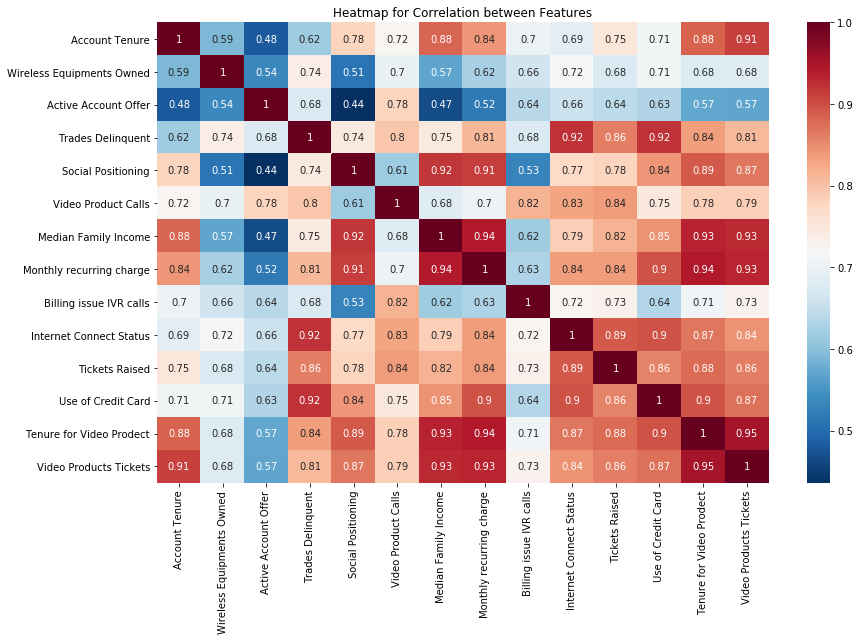

In [42]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
k_corr_matrix1 =df4.corr()
plt.figure(figsize=(13,9))
sns.heatmap(k_corr_matrix1, annot=True, cmap=plt.cm.RdBu_r)
#plt.savefig('heatmap.jpg')
plt.title('Heatmap for Correlation between Features')
plt.savefig('Heatmap.png')

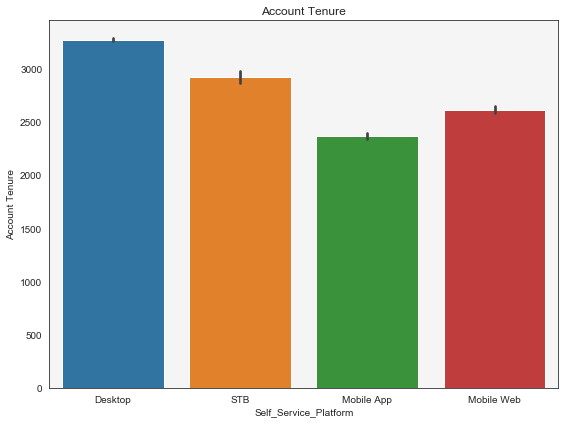

In [43]:
sns.set_style('white')
plt.figure(figsize=(8,6))
sns.barplot(y=train['Account Tenure'],x=train['Self_Service_Platform'])
plt.title('Account Tenure')
ax=plt.axes()
ax.set_facecolor('whitesmoke')
plt.savefig('Account_tenure.png')

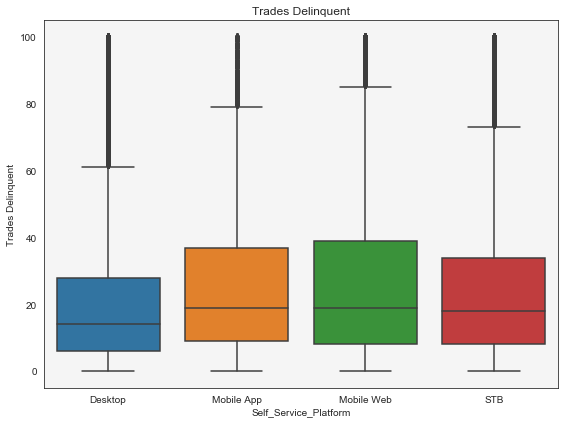

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(y=train['Trades Delinquent'],x=train['Self_Service_Platform'])
plt.xticks(ticks=[0,1,2,3],labels=['Desktop','Mobile App','Mobile Web','STB'])
plt.title('Trades Delinquent')
ax=plt.axes()
ax.set_facecolor('whitesmoke')
plt.savefig('Trades_Delinquent.png')

In [45]:
out_2=train[['Account Tenure','Wireless Equipments Owned','Active Account Offer','Trades Delinquent','Social Positioning','Video Product Calls',
            'Monthly recurring charge','Billing issue IVR calls','Internet Connect Status','Tickets Raised']]
out_2.head()
out2=train[['Account Tenure','Wireless Equipments Owned','Active Account Offer','Trades Delinquent','Social Positioning','Video Product Calls',
        'Monthly recurring charge','Billing issue IVR calls','Internet Connect Status','Tickets Raised','Self_Service_Platform']]

In [46]:
Q1 = out_2.quantile(0.25)
Q3 = out_2.quantile(0.75)
IQR = Q3 - Q1
df5 = out2[~((out_2 < (Q1 - 1.5 * IQR)) |(out_2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df5.shape

(261788, 11)

# Distributing the Data

In [47]:
X4=df5.drop('Self_Service_Platform',axis=1)
y4=df5['Self_Service_Platform']

In [48]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=0.25)
print("X_train shape: "+str(X4_train.shape))
print("X_test shape: "+str(X4_test.shape))
print("y_train shape: "+str(y4_train.shape))
print("y_test shape: "+str(y4_test.shape))

X_train shape: (196341, 10)
X_test shape: (65447, 10)
y_train shape: (196341,)
y_test shape: (65447,)


In [49]:
dt=DecisionTreeClassifier()
param_grid=dict(max_depth=range(1,14))
grid_dt4=GridSearchCV(dt,param_grid,cv=10,scoring='accuracy')
grid_dt4.fit(X4_train,y4_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 14)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

## Applying the Classifier to the training data

In [50]:
clf=DecisionTreeClassifier(max_depth=10).fit(X4_train,y4_train)
y4_pred = clf.predict(X4_test)
metrics.accuracy_score(y4_test,y4_pred)

0.7438385258300609

# Confusion Matrix

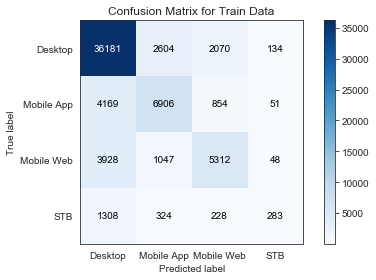

In [51]:
! pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y4_test,y4_pred,title='Confusion Matrix for Train Data')
plt.savefig('Confusion_Matrix.png')

# Some other Visualization Plots

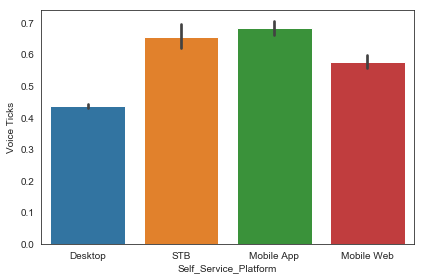

In [52]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Voice Ticks'],data=train)

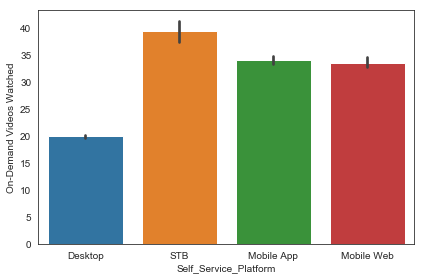

In [53]:
sns.barplot(x=train['Self_Service_Platform'],y=train['On-Demand Videos Watched'],data=train)

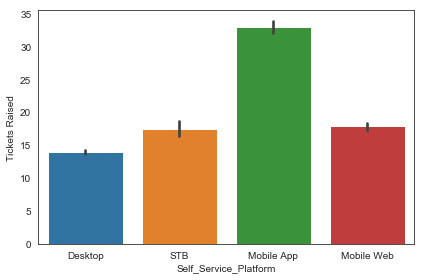

In [54]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Tickets Raised'],data=train)

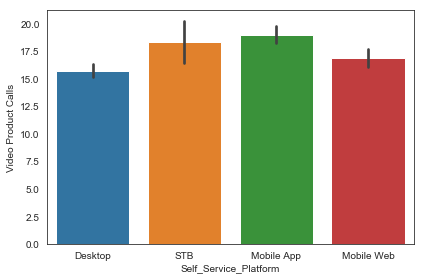

In [55]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Video Product Calls'],data=train)

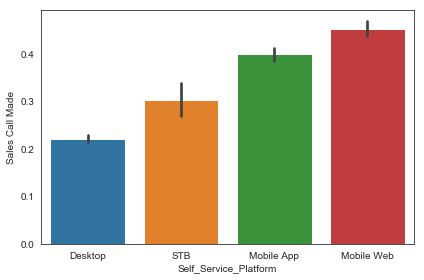

In [56]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Sales Call Made'],data=train)

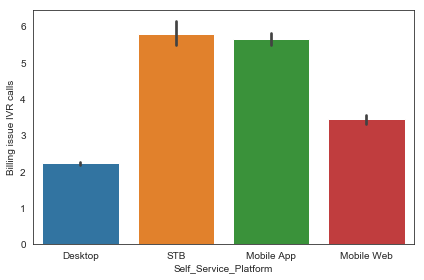

In [57]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Billing issue IVR calls'],data=train)

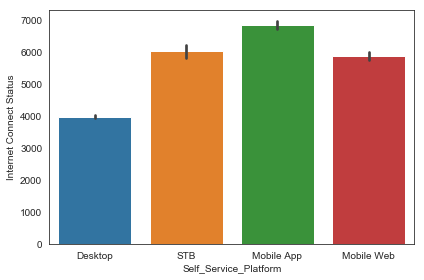

In [58]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Internet Connect Status'],data=train)

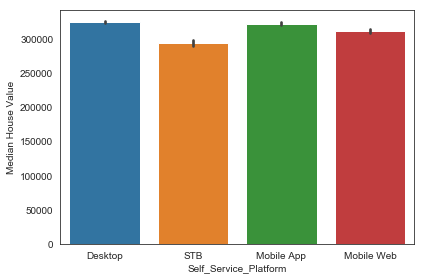

In [59]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Median House Value'],data=train)

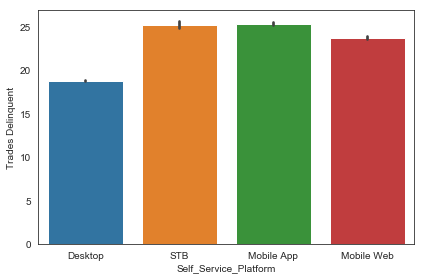

In [60]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Trades Delinquent'],data=train)

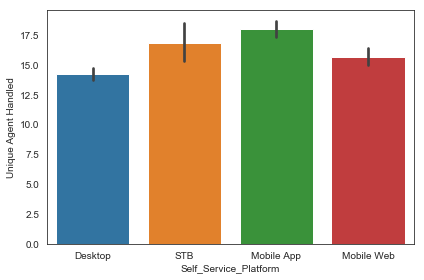

In [61]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Unique Agent Handled'],data=train)

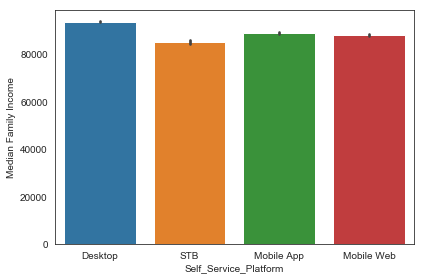

In [62]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Median Family Income'],data=train)

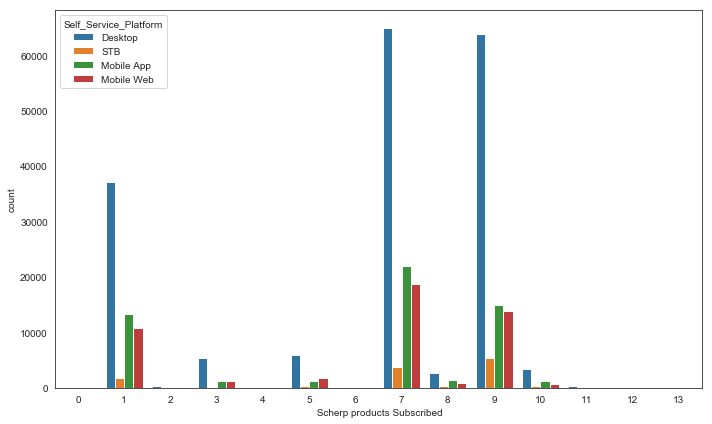

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x=' Scherp products Subscribed',data=train,hue='Self_Service_Platform')

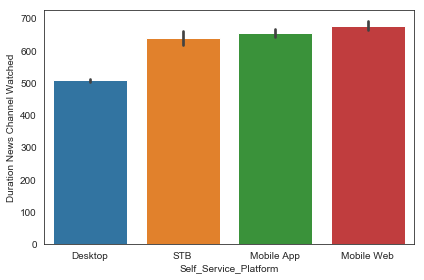

In [64]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Duration News Channel Watched'],data=train)

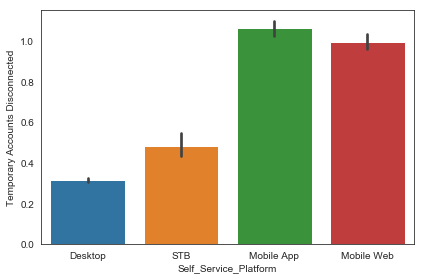

In [65]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Temporary Accounts Disconnected'],data=train)

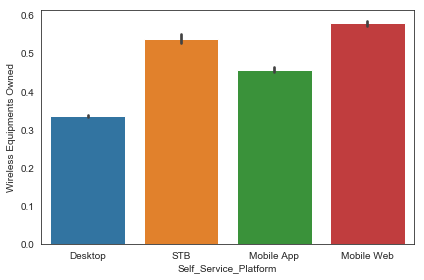

In [66]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Wireless Equipments Owned'],data=train)

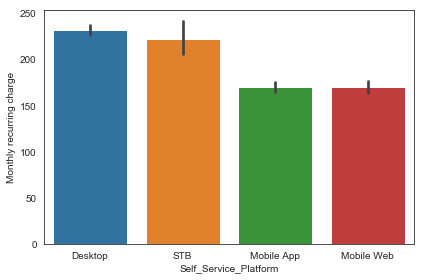

In [67]:
sns.barplot(x=train['Self_Service_Platform'],y=train['Monthly recurring charge'],data=train)